## [Part 1]  NextStore: A data-driven system to predict the growth of Internet celebrity shop

**Background**

The Internet celebrity shop is a popular trend in every city all over the world. There are always some successful
ones, while some shops struggle to survive. You need to find out what are the factors affecting the success of
the shops, so that the owners can make more reasonable decisions.
For this assignment, we will focus on [Boston Italian Restaurants](https://www.yelp.com/search?find_desc=Italian&find_loc=Boston%2C+MA%2C+United+States) and collect at least 20 data from Yelp. The data
that we will collect will be the number of dollar $, number of violations in health score feature, good for groups,
good for kids, pet/dog allowed, the number of reviews to predict the number of star ratings (note you can
choose different data points, just make sure you have at least 6)

### Task 1: data collection

Collect 20 data points from Yelp. Use the provided google form template

\* Note: 0 = No, 1 = Yes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print(os.listdir('.'))

['.config', 'MATRIX.TRAIN.1400', 'Italian Restaurant Data Template.xlsx', 'MATRIX.TEST', 'MATRIX.TRAIN', 'MATRIX.TRAIN.100', 'drive', 'MATRIX.TRAIN.800', 'MATRIX.TRAIN.50', 'MATRIX.TRAIN.400', 'Italian Restaurant Data Template_final.xlsx', 'MATRIX.TRAIN.200', 'Italian Restaurant Data Template_use.csv', 'sample_data']


### Task 2: preprocessing

Create a dataframe from the table you collected, separate the features and labels. You can apply any data preprocessing techniques if necessary, split the train and test sets (test_size = 1/5).

In [3]:
import pandas as pd
import numpy as np

In [4]:
# TODO: establish a DataFrame from the form you collected
from sklearn.model_selection import train_test_split
csv_file_path = 'Italian Restaurant Data Template_final.xlsx'
df = pd.read_excel(csv_file_path)
df.head()
df.columns


Index(['Dollars\n(1-4)', 'Health score \n(# violations)',
       'Good for group (0-1)', 'Good for kids (0-1)', 'Pet/dog allowed(0-1)',
       '# Reviews', 'Star rating\n(1-5)', 'Name'],
      dtype='object')

In [5]:
# TODO: separate the features (X) and labels (y)
X = df.drop(['Star rating\n(1-5)', 'Name'], axis=1).values
y = df['Star rating\n(1-5)'].values

In [6]:
# TODO: preprocessing if necessary
X
y


array([4.5, 4.5, 4.3, 3.7, 3.8, 4.3, 3.9, 4. , 4.3, 4.2, 2.7, 4.2, 4.2,
       4.2, 4.4, 4.3, 4.3, 4. , 4. , 3.9])

In [7]:
# TODO: train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 6)
(4, 6)
(16,)
(4,)


### Task 3: regression

You need to first figure out which type of regression model can be used in this case. Then declare the corresponding regressor object, and fit your model with X_train and y_train.

In [8]:
# TODO: import the regressor from sklearn, declare the regressor object, and fit your model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)




LinearRegression()

In [9]:
print(regressor.coef_)
print(regressor.intercept_)

[-1.78622792e-01  1.10653448e-01 -1.01973994e-01 -3.27614766e-02
  1.44839103e-01  9.37526368e-05]
4.457941389309402


### Task 4: predictions

Make predictions on the test set based on your model (you can try out multiple regressors and pick the one that gives the best reuslt).

In [10]:
# TODO: ^
y_pred = regressor.predict(X_test)
print(y_pred[:4])


[4.24069515 4.13857187 4.09074509 4.11185237]


### Task 5: visualization

Text(0.5, 1.0, 'Star Ratings Linear Regression')

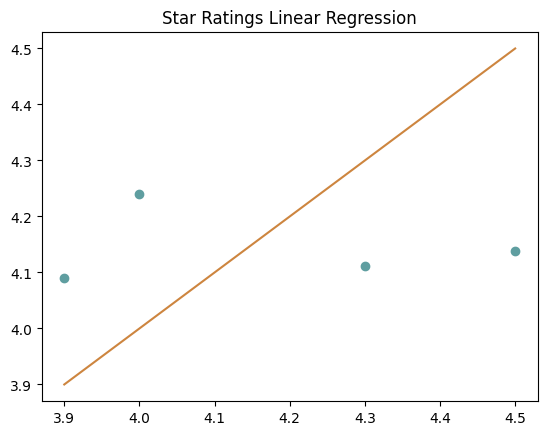

In [11]:
# TODO: plot y_test and y_pred to visualize the performance of your model
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='cadetblue')
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='peru')
plt.title('Star Ratings Linear Regression')

## [Part 2]  SVM for classifying spam emails

In the provided data, the text emails have been pre-processed to ensure that only the email body and subject remain in the dataset; email addresses (EMAILADDR), web addresses (HTTPADDR), currency (DOLLAR) and numbers (NUMBER) were also replaced by the special tokens (features) to allow them to be considered properly in the classification process.

We have done the feature extraction works for you, so you can just load the data matrices (called document-term matrices in text classification) which contain all the data. In a document-term matrix, the ith row represents the ith email, and the jth column represents the jth distinct token. Thus, the (i, j) entry of this matrix represents the number of occurrences of the jth token in the ith document.

For this problem, we chose the set of tokens (vocabulary) to only contain the medium frequency tokens, as the tokens that occur too often or too rarely do not have much classification value. Also, terms were stemmed using a standard stemming algorithm; basically, this means that “price,” “prices” and “priced” have all been replaced with “price,” so that they can be treated as the same token.

In [12]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [13]:
# helper functions
def readMatrix(filename: str):
  with open(filename, 'r') as fd:
      hdr = fd.readline()
      rows, cols = [int(s) for s in fd.readline().strip().split()]
      tokens = fd.readline().strip().split()
      matrix = np.zeros((rows, cols))
      Y = []
      for i, line in enumerate(fd):
          nums = [int(x) for x in line.strip().split()]
          Y.append(nums[0])
          kv = np.array(nums[1:])
          k = np.cumsum(kv[:-1:2])
          v = kv[1::2]
          matrix[i, k] = v
      return matrix, tokens, np.array(Y)


def evaluate(output, label) -> float:
  # Use the code below to obtain the accuracy of your algorithm
  error = float((output != label).sum()) * 1. / len(output)
  print('Error: {:2.4f}%'.format(100 * error))
  return error

### Task 1: simple implementation

Repeat the first task, but with training sets of size ranging from 50, 100, 200, ..., up to 1400 by using the files MATRIX.TRAIN.*. Plot the test error vs. training set size in a curve. Also, report the numer of support vectors for each of the learned models and include this curve in the same plot.

In [14]:
# TODO: read train and test matrices to np arrays
X_train, tokens, y_train = readMatrix('MATRIX.TRAIN.1400')
X_test, _, y_test = readMatrix('MATRIX.TEST')

In [15]:
# TODO: fit classifier
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)

# TODO: test and evluate
y_pred = clf.predict(X_test)
test_error = evaluate(y_pred, y_test)
len(clf.coef_)


Error: 0.8750%


1

### Task 2: explore different training set sizes and visualization

Repeat the first task, but with training sets of size ranging from 50, 100, 200, ..., up to 1400 by using the files MATRIX.TRAIN.*. Plot the test error vs. training set size in a curve. Also, report the numer of support vectors for rach of the learned models.

In [16]:
# TODO: train the support vector classifier with datasets of difference sizes (see different files enclosed in the homework folder),
#       get the test errors and report the number of support vectors for each case.
train_sizes = [50, 100, 200, 400, 800, 1400]
test_errors = []
support_vectors = []

for size in train_sizes:
  X_train, tokens, y_train = readMatrix(f'MATRIX.TRAIN.{size}')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  test_errors.append(evaluate(y_pred, y_test))
  support_vectors.append(len(clf.coef_))


Error: 5.0000%
Error: 3.0000%
Error: 1.2500%
Error: 1.0000%
Error: 1.0000%
Error: 0.8750%


Text(0, 0.5, '# support vectors')

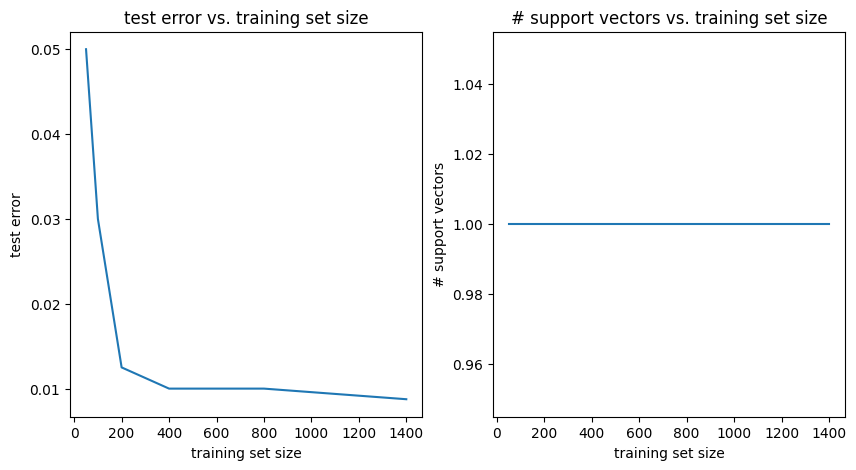

In [17]:
# TODO: plot the test error vs. training set size and # support vectors vs. training set size
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_sizes, test_errors)
plt.title('test error vs. training set size')
plt.xlabel('training set size')
plt.ylabel('test error')
plt.subplot(1, 2, 2)
plt.plot(train_sizes, support_vectors)
plt.title('# support vectors vs. training set size')
plt.xlabel('training set size')
plt.ylabel('# support vectors')